<a href="https://colab.research.google.com/github/GodingWal/Tesla-Stock-Forecast/blob/master/Tesla_Attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*
    !pip install pyramid-arima
    !pip install stepwise
    !pip install pmdarima

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import read_csv
from matplotlib import pyplot
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import accuracy_score
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.impute import SimpleImputer
sns.set()
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA
import datetime
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Tesla.csv - Tesla.csv.csv to Tesla.csv - Tesla.csv.csv


In [0]:
tesla = 'Tesla.csv - Tesla.csv.csv'

In [0]:
df = pd.read_csv(tesla)

In [0]:
df = df.drop(['High', 'Low', 'Close', 'Volume', 'Adj Close'], axis=1)

In [0]:
df['Date_Time'] = pd.to_datetime(df['Date'])
df = df.set_index('Date_Time')
df.drop(['Date'], axis=1, inplace=True)

In [0]:
df.shape

(1692, 1)

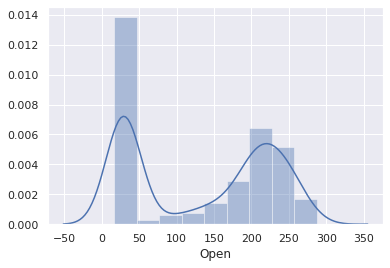

In [0]:
sns.distplot(df['Open']);

In [0]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.214999,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [0]:
df['Open'].skew()

-0.027406009578143844

<function matplotlib.pyplot.show>

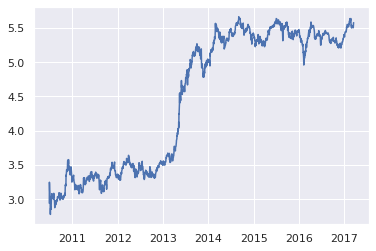

In [0]:
lnprice = np.log(df['Open'])
lnprice
plt.plot(lnprice)
plt.show

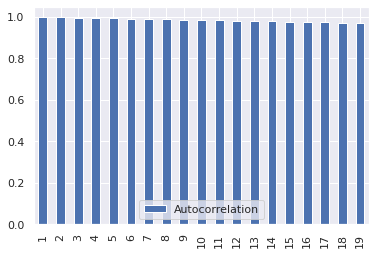

In [0]:
acf_1 = acf(lnprice)[1:20]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.show()

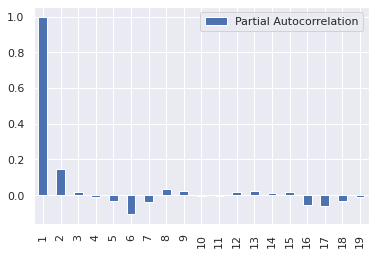

In [0]:
pacf_1 = pacf(lnprice)[1:20]
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.show()

In [0]:
X = lnprice
result = adfuller(pacf_1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -24.220668
p-value: 0.000000
Critical Values:
	1%: -3.859
	5%: -3.042
	10%: -2.661


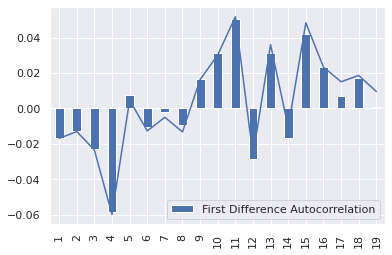

In [0]:
results = ts.adfuller(lnprice, 1)
results
lnprice_diff=lnprice-lnprice.shift()
diff=lnprice_diff.dropna()
acf_1_diff = acf(diff)[1:20]
test_df = pd.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1_diff = pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()

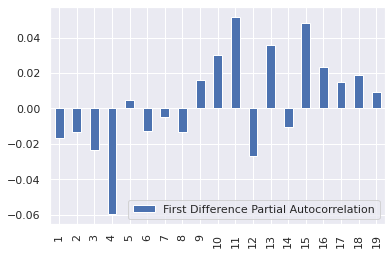

In [0]:
test_df = pd.DataFrame([pacf_1_diff]).T
test_df.columns = ['First Difference Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')

In [0]:
lnprice.head()

Date_Time
2010-06-29    2.944439
2010-06-30    3.249987
2010-07-01    3.218876
2010-07-02    3.135494
2010-07-06    2.995732
Name: Open, dtype: float64

In [0]:
cutoff = pd.to_datetime('2015-10-01')

In [0]:
train = lnprice[lnprice.index < cutoff]
test = lnprice[lnprice.index > cutoff]

In [0]:
import math

                             ARIMA Model Results                              
Dep. Variable:                 D.Open   No. Observations:                 1323
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2546.443
Method:                           css   S.D. of innovations              0.035
Date:                Tue, 26 May 2020   AIC                          -5088.887
Time:                        20:24:16   BIC                          -5078.511
Sample:                             1   HQIC                         -5084.997
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.001      2.013      0.044    5.14e-05       0.004


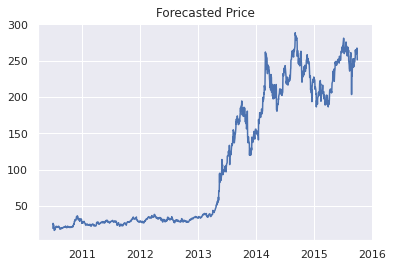

In [0]:
price_matrix = train
model = ARIMA(train, order=(0,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
predictions=model_fit.predict(start=1, typ='levels')
predictions
predictionsadjusted=np.exp(predictions)
predictionsadjusted
plt.plot(predictionsadjusted)
plt.title('Forecasted Price')
plt.show();

In [0]:
prediction = model_fit.predict(start=1, typ='levels')

In [0]:
from pyramid.arima import auto_arima
stepwise_arima = auto_arima(train, start_p=2, start_q=2, max_d=5,
                           max_p=16, max_q=5, m=12, scoring='mse',
                           start_P=2, max_order=20, random_state=78, seasonal=False,
                           d=1, D=1, trace=True, information_criterion='aic',
                           error_action='ignore', stationary=True, 
                           suppress_warnings=True, with_intercept=False,
                           stepwise=True, maxiter=100, n_jobs=50, n_fits=20)

Fit ARIMA: order=(2, 0, 2); AIC=-5076.894, BIC=-5045.763, Fit time=0.797 seconds
Fit ARIMA: order=(0, 0, 0); AIC=3724.854, BIC=3735.230, Fit time=0.003 seconds
Fit ARIMA: order=(1, 0, 0); AIC=-5079.859, BIC=-5064.294, Fit time=0.056 seconds
Fit ARIMA: order=(0, 0, 1); AIC=1948.910, BIC=1964.476, Fit time=0.106 seconds
Fit ARIMA: order=(2, 0, 0); AIC=-5078.168, BIC=-5057.414, Fit time=0.184 seconds
Fit ARIMA: order=(1, 0, 1); AIC=-5078.182, BIC=-5057.428, Fit time=0.272 seconds
Fit ARIMA: order=(2, 0, 1); AIC=-5078.750, BIC=-5052.808, Fit time=0.603 seconds
Total fit time: 2.022 seconds


In [0]:
stepwise_arima.fit(train)
stepwise_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1324
Model:                     ARMA(1, 0)   Log Likelihood                2542.930
Method:                       css-mle   S.D. of innovations              0.035
Date:                Tue, 26 May 2020   AIC                          -5079.859
Time:                        20:22:42   BIC                          -5064.294
Sample:                             0   HQIC                         -5074.024
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2364      1.045      4.053      0.000       2.188       6.285
ar.L1.y        0.9996      0.001   1890.851      0.000       0.999       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0004           +0.0000j            1.0004            0.0000
-----------------------------------------------------------------------------
"""

In [0]:
walk_forward, walk_forward_conf_int = stepwise_arima.predict(n_periods=367, return_conf_int=True)

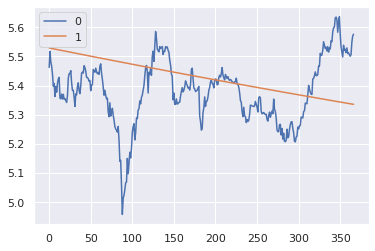

In [0]:
dd = pd.DataFrame(pd.np.column_stack([test[:367], walk_forward])).plot()

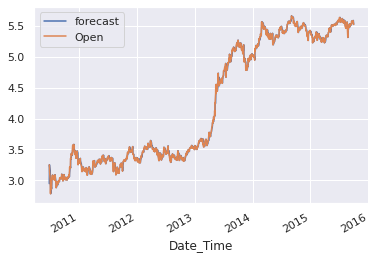

In [0]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

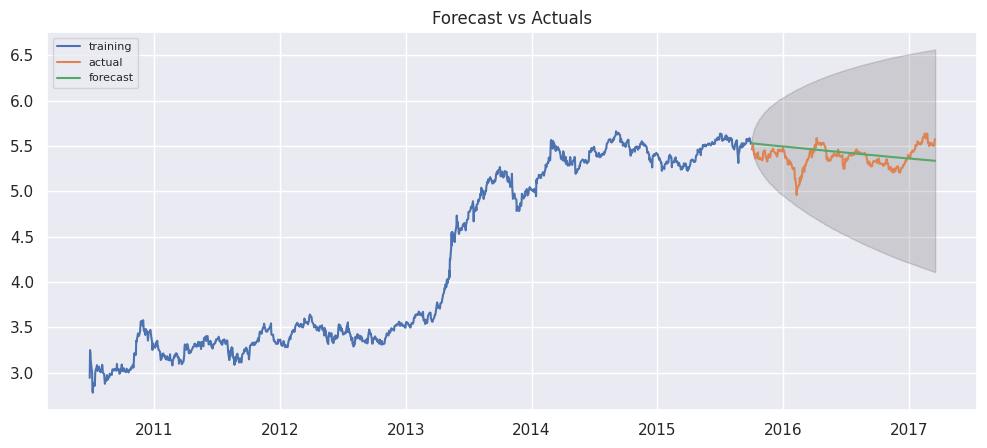

In [0]:
# Make as pandas series
fc_series = pd.Series(walk_forward, index=test.index)
lower_series = pd.Series(walk_forward_conf_int[:, 0], index=test.index)
upper_series = pd.Series(walk_forward_conf_int[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()